### Intro - Perceptrons
* Simplest ANN architecture
* Uses *linear threshold unit (LTU)* - returns weight sum of inputs, applies *step function* to sum, outputs result
* Single LTU can be used for simple linear binary classification
* Perceptron = single layer of LTUs, each one connected to all inputs
* Percepton training based on *Hebb's Rule*. (basically, connection weight between two neurons goes up when they have same output.)
* Linear decision boundary, so Perceptrons not capable of learning complex patterns.


In [1]:
# Perceptron with Iris dataset (Scikit)

import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)


In [2]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


* Perceptron learning algo very similar go SGD.
* Perceptrons do provide class probability (like Logistic Regression classsifier). They simply make predictions based on hard threshold.
* Some limitations can be eliminated with stacked Perceptrons.

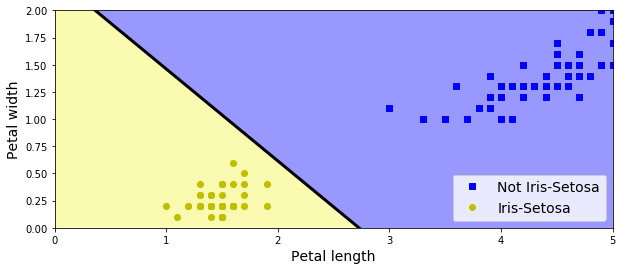

In [3]:
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

X_new = np.c_[
    x0.ravel(), 
    x1.ravel()]

y_predict = per_clf.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot(
    [axes[0], 
     axes[1]], 
    [a * axes[0] + b, 
     a * axes[1] + b], 
    "k-", linewidth=3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

### MLPs and Backpropagation
* MLP contains one input layer, at least one hidden layer (LTU based), and one output layer (LTU based).
* Backpropagation intro'd in [1986 paper](https://goo.gl/Wl7Xyc). Can be described as Gradient Descent using reverse-mode autodiff.
* For each training instance:
    * Find output of each node in each consecutive layer (forward pass).
    * Measure output error & how much each node in last hidden layer contributed to it.
    * Measure how much each node in *previous* hidden layer contributed to *this* hidden layer.
    * Repeat until *input* layer is reached (backward pass).
    * Adjust each connection weight to reduce the error.
* To make algorithm work, MLP architecture changed to use logistic function delta(z) = 1/(1+exp(-z)) instead of step function.
* Backpropagation can also use hyperbolic tangent or ReLU functions if desired.

In [4]:
# Activation functions

def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

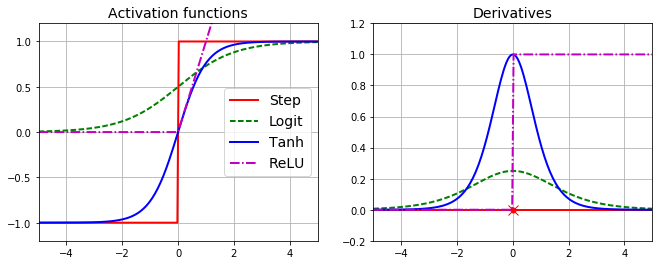

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

In [6]:
# activation functions, continued
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(
        -activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)


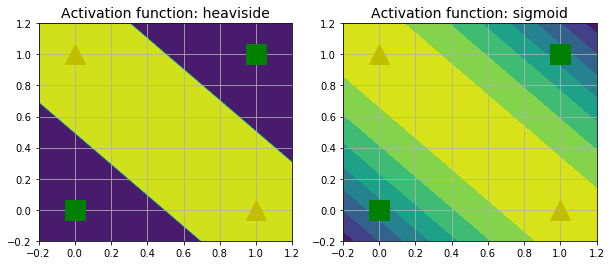

In [7]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)
plt.show()

### MLP Training
* MLP often used for classification - each output corresponding to distinct binary class (ex: urgent/not-urgent, spam/not-spam, ...)
* If exclusive classes, output layer often uses shared **softmax** function.

### DNN Training with "plain" TF
* Use **mini-batch gradient descent** on MNIST dataset
* Specify #inputs, #outputs, #hidden neurons in each layer

In [18]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

# placeholders for training data & targets
# X,y only partially defined due to unknown #instances in training batches

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64,   shape=(None),           name="y")

In [20]:
# now need to create two hidden layers + one output layer

'''
No need to define your own. TF shortcuts:
fully_connected()
'''

def neuron_layer(X, n_neurons, name, activation=None):
    
    # define a name scope to aid readability
    with tf.name_scope(name):
        
        n_inputs = int(X.get_shape()[1])
        
        # create weights matrix. 2D (#inputs, #neurons)
        # randomly initialized w/ truncated Gaussian, stdev = 2/sqrt(#inputs)
        # aids convergence speed
        
        stddev = 1 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)       
        W = tf.Variable(init, name="weights")
        
        # create bias variable, initialized to zero, one param per neuron
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        
        # Z = X dot W + b
        Z = tf.matmul(X, W) + b
        
        # return relu(z), or simply z
        if activation=="relu":
            return tf.nn.relu(Z)
        else:
            return Z

In [22]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X,       n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    
    # logits = NN output before going thru softmax activation
    logits =  neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    
    # sparse_softmax_cross_entropy_with_logits() -- TF routine, handles corner cases for you.
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y, 
        logits=logits)
    
    # use reduce_mean() to find mean cross-entropy over all instances.
    loss = tf.reduce_mean(
        xentropy, 
        name="loss")

# use GD to handle cost function, ie minimize loss
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

# use accuracy as performance measure.

with tf.name_scope("eval"):        # verify whether highest logit corresponds to target class
    correct = tf.nn.in_top_k(      # using in_top_k(), returns 1D tensor of booleans
        logits, y, 1)
    
    accuracy = tf.reduce_mean(             # recast booleans to float & find avg.
        tf.cast(correct, tf.float32))      # this gives overall accuracy number.

init = tf.global_variables_initializer()   # initializer node
saver = tf.train.Saver()                   # to save trained params to disk

### Execution Phase
* Load MNIST using TF helpers (fetch, auto-scale, shuffle, provide minibatch function)

In [25]:
# load MNIST

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

n_epochs = 20
batch_size = 50

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [26]:
# Train
with tf.Session() as sess:

    init.run() # initialize all variables
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):

            # use next_batch() to fetch data
            X_batch, y_batch = mnist.train.next_batch(batch_size)

            sess.run(
                training_op, 
                feed_dict={X: X_batch, y: y_batch})

        acc_train = accuracy.eval(
            feed_dict={X: X_batch, y: y_batch})

        acc_test = accuracy.eval(
            feed_dict={X: mnist.test.images,
                       y: mnist.test.labels})

        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_model_final.ckpt")


0 Train accuracy: 0.94 Test accuracy: 0.8753
1 Train accuracy: 0.9 Test accuracy: 0.9087
2 Train accuracy: 0.94 Test accuracy: 0.9212
3 Train accuracy: 0.88 Test accuracy: 0.9239
4 Train accuracy: 0.88 Test accuracy: 0.9335
5 Train accuracy: 0.96 Test accuracy: 0.9365
6 Train accuracy: 0.92 Test accuracy: 0.9415
7 Train accuracy: 0.94 Test accuracy: 0.9449
8 Train accuracy: 0.96 Test accuracy: 0.9459
9 Train accuracy: 0.94 Test accuracy: 0.9497
10 Train accuracy: 1.0 Test accuracy: 0.9539
11 Train accuracy: 0.94 Test accuracy: 0.9563
12 Train accuracy: 0.98 Test accuracy: 0.958
13 Train accuracy: 0.98 Test accuracy: 0.9584
14 Train accuracy: 0.94 Test accuracy: 0.9614
15 Train accuracy: 1.0 Test accuracy: 0.9622
16 Train accuracy: 0.96 Test accuracy: 0.9639
17 Train accuracy: 0.92 Test accuracy: 0.9635
18 Train accuracy: 0.98 Test accuracy: 0.9654
19 Train accuracy: 0.92 Test accuracy: 0.9667


### Using in production
* Now trained - you can use the NN to predict.

In [27]:
with tf.Session() as sess:

    # load from disk
    saver.restore(sess, save_path) #"my_model_final.ckpt")
    
    # grab images you want to classify
    X_new_scaled = mnist.test.images[:20]
    
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(np.argmax(Z, axis=1))
    print(mnist.test.labels[:20])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


### Parameter Tuning
* Way too many parameters - Grid Search approach not time-effective.
* 1st option: [randomized search](https://goo.gl/QFjMKu).
* 2nd option: [Oscar](http://oscar.calldesk.ai/)
* Start with common defaults to restrict search space.

### Number of hidden layers
* Deep nets have **much better parameter efficiency** than shallow ones. (They can model complex functions with much fewer neurons.)
* Largely due to hierarchical nature of most data modeling probs


### Number of neurons per hidden layer
* Determined by input dimensions. Ex: MNIST requires 28x28 inputs, 10 outputs
* Try increasing # of layers before # neurons/layer.
* Simple trick: pick model w/ excessive layers & neurons, use early stopping, regularization, dropout, etc. to prevent overfit.

### Activation functions
* Defaults:
    * use ReLU in hidden layers. Faster & helps avoid GD getting stuck on local plateaus.
    * use Softmax in output layer (for classification; none needed for regression.) 